# Maximum Likelihood Estimation


__Our goal is to maximize the likelihood of observing the training dataset. 
To this end, we aim to maximize the conditional likelihood of observing particular outputs given inputs w.r.t. parameters.__



## Setup $$ D = \{(x_i,y_i) \}_{i=1} ^n \; \textrm{ s.t. } \;  D \sim_{\textrm{i.i.d}} \mathbb P(\mathcal X , \mathcal Y)$$  

where $\mathcal X$ and $\mathcal Y$ represent input and output spaces, respectively.







# 1. $$ argmax_{w} \; \mathbb{P}_{model} (D ;w)$$
__Find $w$ that maximize the likelihood of seeing the data__

# 2. $$ argmax_{w} \; \prod_{i=1} ^n \mathbb{P}_{model} (x_i,y_i ;w)$$
__Data $ D $ is sampled i.i.d.__

# 3. $$ argmax_{w} \; \prod_{i=1} ^n \mathbb{P}_{model} (y_i | x_i; w) \mathbb{P}_{model} (x_i; w) $$
__Apply the conditional probability__

# 4. $$ argmax_{w} \; \prod_{i=1} ^n \mathbb{P}_{model} (y_i | x_i; w)$$
__Probability of an input $\mathbb P (x_i;w)$ is constant__

# 5. $$ argmax_{w} \; log\Big(\prod_{i=1} ^n \mathbb{P}_{model} (y_i | x_i; w) \Big)$$
__Instead of computing product of probabilities, compute sum of log probabilities__

# 6. $$ argmax_{w} \; \sum_{i=1} ^n log(\mathbb{P}_{model} (y_i | x_i; w))  $$
__Distribute the log__ and obtain **Maximize the log likehood**.


# $$ \textbf{MLE for Regression: } \mathcal Y = \mathbb R $$

## Gaussian Distribution to Model Outputs $$ \mathbb{P}_{model}(y \mid x,w)=\frac{1}{\sqrt{2\pi \sigma^2}} \text{exp} \Big( - \frac{(y - f_w(x))^2}{2\sigma^2}\Big)$$
where $f_w(x)$ denotes a parametrized predictor function (e.g. linear regression or a feed forward neural network). 

__Hence, we make the assumption that the conditional likelihood of observing outputs given inputs is gaussian distributed__.

## 7. $$ argmax_{w} \; \sum_{i=1} ^n log\Big( \frac{1}{\sqrt{2\pi \sigma^2}} \text{exp} \big( - \frac{(y - f_w(x))^2}{2\sigma^2}\big) \Big)  $$
__Insert our assumption about outputs given inputs__

## 8. $$ argmax_{w} \; \sum_{i=1} ^n log\Big( \frac{1}{\sqrt{2\pi \sigma^2}} \Big) + \log \Big(\text{exp} \big( - \frac{(y - f_w(x))^2}{2\sigma^2}\big)  \Big)$$
__Product Rule of Log.__

# 9. $$ argmax_{w} \; \sum_{i=1} ^n \log \Big(\text{exp} \big( - \frac{(y - f_w(x))^2}{2\sigma^2}\big)  \Big)$$
__Remove the Constant__

# 10. $$ argmax_{w} \; \sum_{i=1} ^n - \frac{(y - f_w(x))^2}{2\sigma^2}$$
__Logaritm of an Exponential__

# 11. $$ argmax_{w} \; \sum_{i=1} ^n - (y - f_w(x))^2 $$
__Remove the Constant__

# 12. $$ argmin_{w} \; \sum_{i=1} ^n (y - f_w(x))^2 $$
__Argmax to Argmin__ 

__We want to minimize the squared Loss (L2 loss)__

# 13. $$ \mathcal{L}(w) = \frac{1}{n} \; \sum_{i=1} ^n (y - f_w(x))^2 $$
The loss funciton is the mean sequared loss

# 14. $$ \frac{\partial \mathcal{L}(w) }{\partial w} = \frac{1}{n} \sum_{i=1} ^n 2(f_w(x)-y) $$

because
1. $ 2 (y - f_w(x)) \frac{\partial \mathcal{L}(w) }{\partial w} (y - f_w (x))$
2. $ 2 (y - f_w(x)) (0 - 1)$
3. $ 2 (f_w(x)-y)$


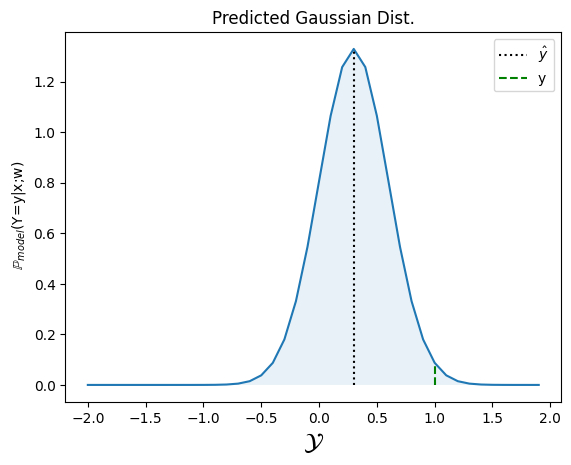

L2 loss: 0.8328272667935234


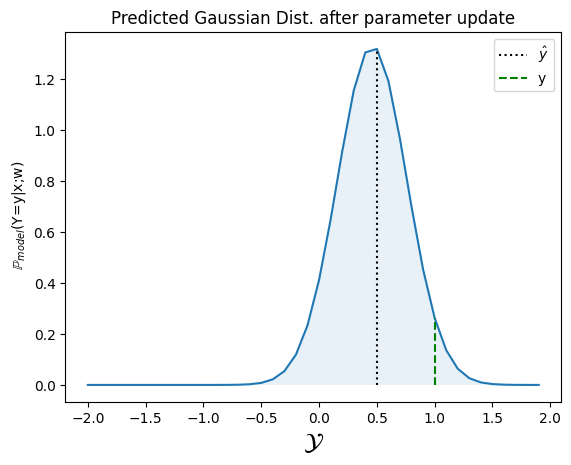

L2 loss: 0.5440090431565608


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_dist(y,sigma,mu):
    return 1/np.sqrt(2*np.pi * sigma**2) * np.exp(- (y-mu)**2 /(2*sigma**2) )

# (1) Outputs
y_space = np.arange(-2, 2, 0.1)
# (2) An output
y= 1.0
# (3) Parameters for the conditional likelihood of outputs given inputs
mu,std=0.3, 0.3

# (4) Prediction: The mean parameter of a predicted Gaussian Dist.;
hat_y = gaussian_dist(y,std,mu)
# (5) Predicted Gaussian Dist. over Output Space
dist=gaussian_dist(y_space,std,mu)
plt.plot(y_space,dist)
plt.fill_between(y_space,dist,alpha=.1)
plt.vlines(y_space[dist.argmax()], 0, dist.max(), linestyles ="dotted", colors ="k",label=r'$\hat{y}$')
plt.vlines(y, 0, gaussian_dist(y,std,mu), linestyles ="dashed", colors ="g",label='y')
plt.xlabel(r'$\mathcal{Y}$', fontsize=18)
plt.ylabel(r' $\mathbb{P}_{model}$(Y=y|x;w)')
plt.title('Predicted Gaussian Dist.')
plt.legend()
plt.show()


print(f'L2 loss: {(hat_y-y)**2}')

# Parameter Update: mu := mu - \eta* dLdmu 
mu -= 1.0 *(2*((hat_y-y) * hat_y) )
# (4) Prediction: The mean parameter of a predicted Gaussian Dist.;
hat_y = gaussian_dist(y,std,mu)
# (5) Predicted Gaussian Dist. over Output Space
dist=gaussian_dist(y_space,std,mu)
plt.plot(y_space,dist)
plt.fill_between(y_space,dist,alpha=.1)
plt.vlines(y_space[dist.argmax()], 0, dist.max(), linestyles ="dotted", colors ="k",label=r'$\hat{y}$')
plt.vlines(y, 0, gaussian_dist(y,std,mu), linestyles ="dashed", colors ="g",label='y')
plt.xlabel(r'$\mathcal{Y}$', fontsize=18)
plt.ylabel(r' $\mathbb{P}_{model}$(Y=y|x;w)')
plt.title('Predicted Gaussian Dist. after parameter update')
plt.legend()
plt.show()

print(f'L2 loss: {(hat_y-y)**2}')

# Laplace Distribution to Model Ouputs $$ \mathbb{P}_{model}(y \mid x,w) = \frac{1}{2b} exp\big( - \frac{ |y- f_w(x)|}{b}\big)$$

where $f_w(x)$ denotes a parametrized predictor function (e.g. linear regression or a feed forward neural network). 

__Hence, we make the assumption that the conditional likelihood of observing outputs given inputs has Laplace distribution__.

Notice that the errors are not squared as done in the Gaussian distribution. Hence, possible outliers induces a less strong error.

## 7. $$ argmax_{w} \; \sum_{i=1} ^n log\Big(\frac{1}{2b} exp\big( - \frac{ |y_i - f_w(x_i)|}{b}\big) \Big)  $$
__Insert Laplace  Distribution__

# 8. $$ argmin_{w} \; \sum_{i=1} ^n \mid y_i - f_w(x_i) \mid  $$
__Perform similar steps as done above__ We want to minimize the absolute loss (L1 loss)

# 9. $$ \mathcal{L}(w) = \frac{1}{n} \; \sum_{i=1} ^n (y - f_w(x))^2 $$
The loss funciton is the mean absolute loss

# 9 $$ \frac{\partial \mathcal{L}(w) }{\partial w} |y - f_w (x)|=\frac{x-y}{|x-y|} $$

Notice that at $x-y=0$, this function is not __differentiable__.

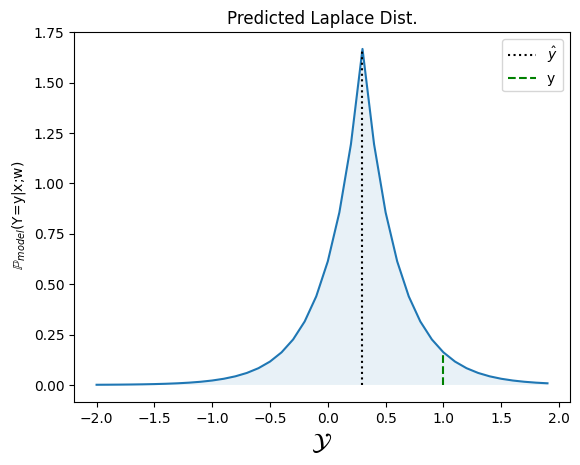

L1 loss: 0.7375696869832442


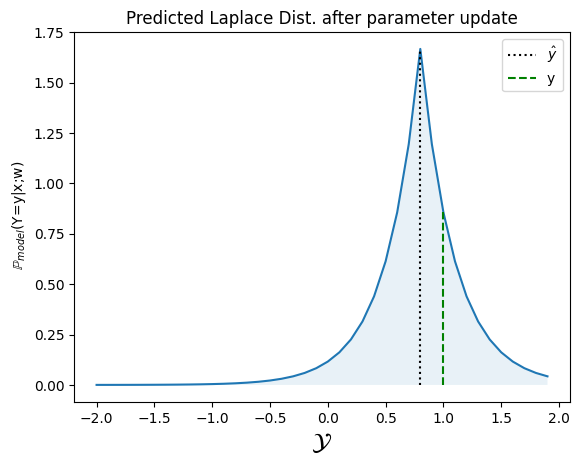

L1 loss: 0.14430480161234638


In [2]:
def laplace_dist(y,scale=0.3, loc=0.0):
    return 1/(2*scale) * np.exp(- np.abs(y-loc) /scale )


# (1) Output Space
y_space = np.arange(-2, 2, 0.1)
# (2) An output
y= 1.0
# (3) Parameters
loc,scale=0.3, 0.3

# (4) Prediction: The mean parameter of a predicted Laplace Dist.;
yhat = laplace_dist(y,scale,loc)
# (5) Predicted Gaussian Dist. over Output Space
dist=laplace_dist(y_space,scale,loc)

plt.plot(y_space,dist)
plt.fill_between(y_space,dist,alpha=.1)
plt.vlines(y_space[dist.argmax()], 0, dist.max(), linestyles ="dotted", colors ="k",label=r'$\hat{y}$')
plt.vlines(y, 0, laplace_dist(y,scale,loc), linestyles ="dashed", colors ="g",label='y')
plt.xlabel(r'$\mathcal{Y}$', fontsize=18)
plt.ylabel(r' $\mathbb{P}_{model}$(Y=y|x;w)')
plt.title('Predicted Laplace Dist.')
plt.legend()
plt.show()


err=hat_y-y
abs_err=np.abs(err)
print(f'L1 loss: {abs_err}')

# Parameter Update: mu := mu - \eta* dLdloc 
loc -= .5 * (err/abs_err)
# (4) Prediction: The mean parameter of a predicted Gaussian Dist.;
hat_y = laplace_dist(y,scale,loc)
# (5) Predicted Gaussian Dist. over Output Space
dist=laplace_dist(y_space,scale,loc)


plt.plot(y_space,dist)
plt.fill_between(y_space,dist,alpha=.1)
plt.vlines(y_space[dist.argmax()], 0, dist.max(), linestyles ="dotted", colors ="k",label=r'$\hat{y}$')
plt.vlines(y, 0, laplace_dist(y,scale,loc), linestyles ="dashed", colors ="g",label='y')
plt.xlabel(r'$\mathcal{Y}$', fontsize=18)
plt.ylabel(r' $\mathbb{P}_{model}$(Y=y|x;w)')
plt.title('Predicted Laplace Dist. after parameter update')
plt.legend()
plt.show()

err=hat_y-y
abs_err=np.abs(err)
print(f'L1 loss: {abs_err}')

# $$ \textbf{MLE for Classification: } \mathcal Y = \{0, 1 \} $$

# Bernoulli Distribution $$ \mathbb{P}_{model}(y \mid x,w) = f_w(x)^y (1 - f_w(x) )^{ (1-y) } $$

where 
## $$ f_w(x) \in [0,1] $$

since the Bernoulli distribution is a discrete probability distribution having two possible outcomes. 
If $f_w(x)$ signals the probability of an event occuring, the probability of other event happing is $1-f_w(x)$.



# 7. $$ argmax_w \sum_i ^ N log\Big( f_w (x_i)^{y_i} \big(1- f_w (x_i) \big)^{1-y_i} \Big)$$
__Insert Bernoulli   Distribution__

# 8. $$ argmin_{w} \; \sum_{i=1} ^n -y_i log\big(f_w(x_i)\big) - \big(1- y_i\big) log\big(1- f_w(x_i)\big)  $$

__Perform similar steps as done above__ We want to minimize __the binary cross-entropy loss__.


# 9. $$ \nabla_{w} \mathcal{L}(y,f_w(x_i)) = \nabla_{w} \Big(-y_i log\big( f_w(x_i) \big) - \big(1- y_i\big) log\big(1- f_w(x_i) \big) \Big) $$


## 10. $$  \nabla_w \Big(- y_i log \Big( \frac{1}{1+exp(- w^T x_i)}\Big)  - (1-y_i) \; log \Big( 1- \frac{1}{1+exp(- w^T x_i)} \Big) \Big)$$

### 11. $$ \nabla_{w} \mathcal{L}(y,f_w(x_i)) = \frac{\hat{y} - y}{\hat{y} (1-\hat{y})} \times \Big( \frac{1}{1+exp(-w^T x_i)} \times 1-\frac{1}{1+exp(-w^T x_i)}  \Big) \times x_i$$

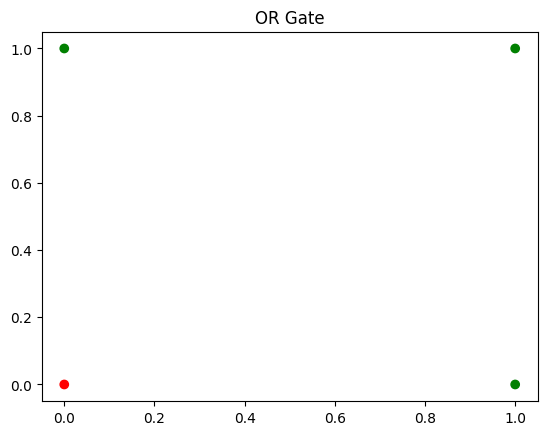

OR:
[[0]
 [1]
 [1]
 [1]]
Pred:
[[0.]
 [1.]
 [1.]
 [1.]]


In [3]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,1]).reshape(len(X),1)
plt.scatter(X[:,0],X[:,1],c=['g' if i==1 else 'r' for i in y])
plt.title('OR Gate')
plt.show()

w = np.random.randn(2,1)

for i in range(1000):
    # (1) 
    fw_x= 1 / (1+np.exp(-X@w))
    # (2) BCE loss
    bce_loss=(-y * np.log(fw_x) - (1 - y ) * np.log(1-fw_x)).mean()
    # (3) Compute gradients w.r.t. params
    dl_dw= ((fw_x - y)/(fw_x*(1-fw_x))) * (fw_x * (1-fw_x))
    dl_dw = X.T@dl_dw
        
    # (4) Update params
    w-= .01 * dl_dw
    

print(f'OR:\n{y}\nPred:\n{np.around(fw_x)}')

# $$ \textbf{MLE for Multi-Class} $$

# Bernoulli Distribution $$ \mathbb{P}_{model}(\mathbf y \mid x,w) = \prod_c ^C f_w ^{(c)}(x) ^{y_c}$$

## where  $$ \mathbf{y} \text{ is a one-hot vector with } \mathbf y _c \in \{0, 1\}$$
##   $$ f_w(x) \text{ yields a C dimensional vector within a unit interval} f_w(x) \in [0, 1]$$

# 7. $$ argmax_w \sum_i ^ N log\Big( \prod_c ^C f_w ^{(c)} (x_i) ^{y_{i,c}} \Big)$$
__Insert Bernoulli   Distribution__ for multiple classes

+ where $y_{i,c}$ denotes the c.th class value of the i.th label in the training dataset
+ where $f_w ^{(c)}(x_i)$ denotes the predicted c.th class value of the i.th input in the training dataset


# 8. $$ argmax_w \sum_i ^ N \sum_c ^C log\Big(f_w ^{(c)} (x) ^{y_{i,c}} \Big) $$

__Log over product__

# 9. $$ argmax_w \sum_i ^ N \sum_c ^C  y_{i,c} log\big(f_w ^{(c)} (x) \big) $$

__Log of Power__

# 10. $$ argmin_w \sum_i ^ N \sum_c ^C  -y_{i,c} \; log\big(f_w ^{(c)} (x) \big) $$

__Argmax to Argmin__ Cross Entropy loss

# Requirements for predicting valid Discrete Distribution

## 1. $$ f_w ^{(c)} (x) \in [0,1]$$
## 2. $$ \sum_c ^C f_w ^{(c)} (x) = 1 $$

## Softmax, Softargmax or Normalized Exponential Function $$ f_w ^{(c)} (x) = \frac{exp(s_c)}{\sum_k ^C exp(s_k)} $$

__The two requirements are satisfied!__


# 11. $$ argmin_w \sum_i ^ N \sum_c ^C  -y_{i,c} \; log\Big( \frac{exp(s_c)}{\sum_k ^C exp(s_k)} \Big) $$

__Insert Softmax__

# 12. $$ argmin_w \sum_i ^ N \sum_c ^C  -y_{i,c} \; \big( s_c - log \big( \sum_k ^C exp(s_k) \big) \big) $$

__Log of Quotient__

where 
+ $s_c$ is a director contributiion fo the loss function. This means that $s_c$ does not saturate!!!

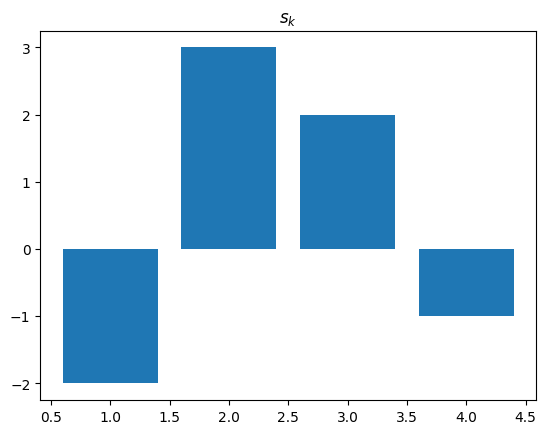

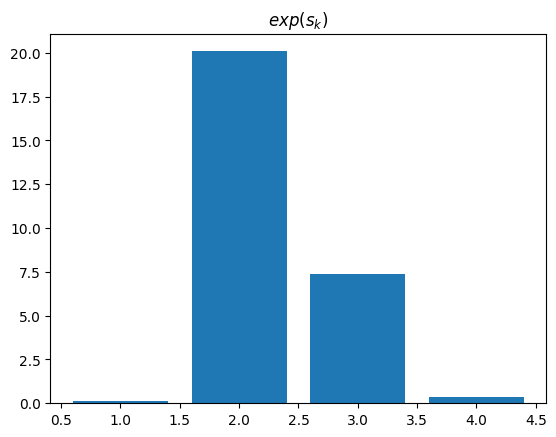

In [4]:
scores=np.array([-2, 3, 2, -1])
exp_scores = np.exp(scores)


plt.bar(range(1,5),scores)
plt.title(r'$s_k$')
plt.show()

plt.bar(range(1,5),exp_scores)
plt.title(r'$exp(s_k)$')
plt.show()


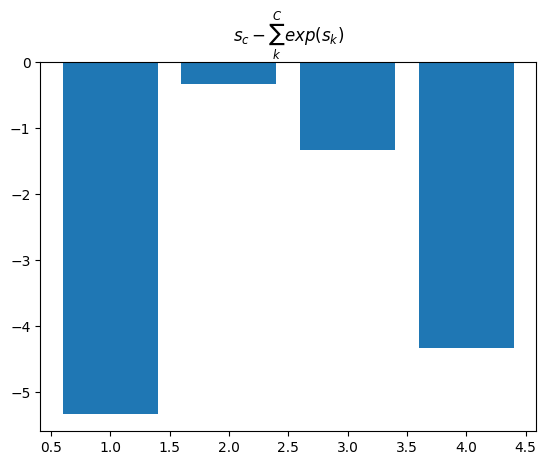

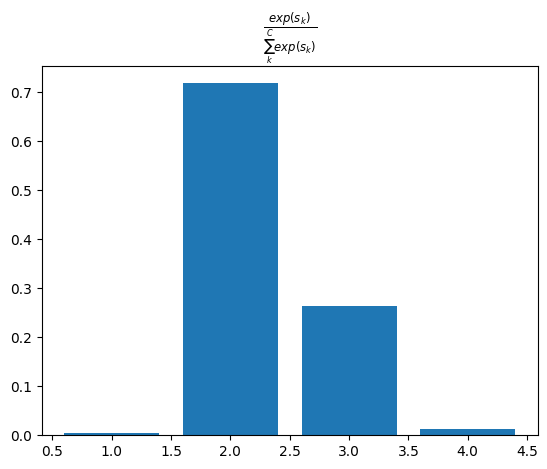

In [5]:
plt.bar(range(1,5),scores - np.log(exp_scores.sum()))
plt.title(r'$s_c - \sum_k ^C exp(s_k)$')
plt.show()


plt.bar(range(1,5),exp_scores / exp_scores.sum())
plt.title(r'$\frac{exp(s_k)}{\sum_k ^C exp(s_k)}$')

plt.show()

## Multi-class Generalization 
### From Softmax to Sigmoid $$ softmax(x) = (\frac{exp(x_1)}{exp(x_1)+exp(x_2)}, \frac{exp(x_2)}{exp(x_1)+exp(x_2)})$$


## $$ = (\frac{exp(x_1)}{exp(x_1)+ 1}, \frac{1}{exp(x_1)+1})$$


## $$ = (\frac{1}{1+exp(-x_1)}, 1- \frac{1}{1+exp(-x_1)})$$

## $$ = (\sigma(x_1), 1-\sigma(x_1))$$


The softmax function is a multi-class generalization of the sigmoid function.


+ It is invariant to adding the same scalar to all its inputs softmax(x) = softmax(x+c)
+ Numericaly more stable => 
### $$ softmax(x) = softmax(x - max_{k=1...C} x_k)$$

In [6]:
def naive_softmax(s):
    return np.exp(s)/ (np.exp(s).sum())

def softmax(s): # invariant to adding the scalar to all inputs
    return naive_softmax(s - s.max())

s=np.array([1.1, -2.1, 4.4, 2.1])
print(naive_softmax(s))
print(softmax(s))


[0.03239214 0.00132038 0.8782365  0.08805098]
[0.03239214 0.00132038 0.8782365  0.08805098]


In [7]:
def g(x):
    out=1 / (1+np.exp(-x))
    dout = (out * (1-out))
    return out,dout

def bce_loss(y,yhat):
    loss=np.mean(-y * np.log(yhat) - (1 - y ) * np.log(1-yhat))
    dl_dyhat=(yhat - y)/(yhat*(1-yhat))
    return loss,dl_dyhat

def mlp(X,y,lr=0.001,loss=bce_loss,hidden_size=50):
    nx,dx=X.shape
    ny,dy=y.shape
    assert nx==ny

    w=np.random.randn(dx,hidden_size)
    h=np.random.randn(hidden_size,dy)
    
    for epoch in range(10000):
        # (1) Forward
        gx, dgx = g(X @ w)
        yhat, dyhat= g(gx @ h)
        
        # (2) Cross Entropy Loss
        loss,dl_dyhat=bce_loss(y,yhat)
        
        # (3) Backward
        dl_g2 = dl_dyhat * dyhat
        dl_dh = gx.T @ dl_g2
        dl_dgx = dl_g2 @ h.T
        dl_dw = X.T @ (dl_dgx * dgx)
        
        # (4) Update
        w -= lr * dl_dw
        h -= lr * dl_dh
        
    return np.round(yhat)

    
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])

print("OR:\n",mlp(X,np.array([[0], [1], [1], [1]])))
print("AND:\n",mlp(X,np.array([[0], [0], [0], [1]])))
print("XOR:\n",mlp(X,np.array([[0], [1], [1], [0]])))
print("NAND:\n",mlp(X,np.array([[1], [1], [1], [0]])))

OR:
 [[0.]
 [1.]
 [1.]
 [1.]]
AND:
 [[0.]
 [0.]
 [0.]
 [1.]]
XOR:
 [[0.]
 [1.]
 [1.]
 [0.]]
NAND:
 [[1.]
 [1.]
 [1.]
 [0.]]
